Yusuf Niko Fitranto

1306620033

Fisika A 2020

**Pengolahan Citra Digital - Tugas 7**

Pemrograman dilakukan untuk membuktikan nilai konvolusi sama dengan korelasi ketiak kernel diputar $180^o$. Hal yang dilakukan pertama kali yaitu menginstall dan mengimpor modul yang digunakan, lalu memanggil gambar sampel untuk diuji. Gambar sampel nantinya akan dibuat menjadi warna abu-abu (grayscale), lalu gambar yang sudah di grayscale diolah kernelnya. Untuk melakukan konvolusi dan korelasi, maka diperlukan definisi rotasi awal sebesar $90^o$ searah jarum jam, kemudian memisalkan kernel gambar dengan matriks. Matriks yang digunakan yakni membuat gambar menjadi box blur dengan angka:

$ \begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2
\end{bmatrix}$

Kernel matriks gambar tersebut akan diputar $180^o$ sehingga menjadi:

$ \begin{bmatrix}
0 & 1 & 2 \\
-1 & 1 & 1 \\
-2 & -1 & 0
\end{bmatrix}$

Tahapan selanjutnya mendeteksi konvolusi dan korelasi untuk koordinat x dan y serta memasukkan rumus untuk konvolusi dan rumus kolerasi kernel. Hasil akan menunjukkan 4 gambar yang masing-masing sudah mengalami perubahan.

Hasil 4 gambar tersebut menunjukkan korelasi memiliki perbedaan dengan konvolusi, tetapi jika gambar korelasi dirotasikan $180^o$, maka hasil gambar sama dengan konvolusi.

Tugas selanjutnya yakni membuktikan perbandingan antara konvolusi gambar FFT dengan konvolusi gambar langsung. Langkah yang dilakukan yakni membuat kedua fungsi dan menampilkan gambar beserta waktu kerja ketika program berjalan. Hasil menunjukkan bahwa konvolusi gambar FFT lebih cepat berjalan programnya dibandingkan dengan konvolusi langsung. 

In [149]:
#Instalasi Modul
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
#Import Modul
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import ndimage, misc, signal


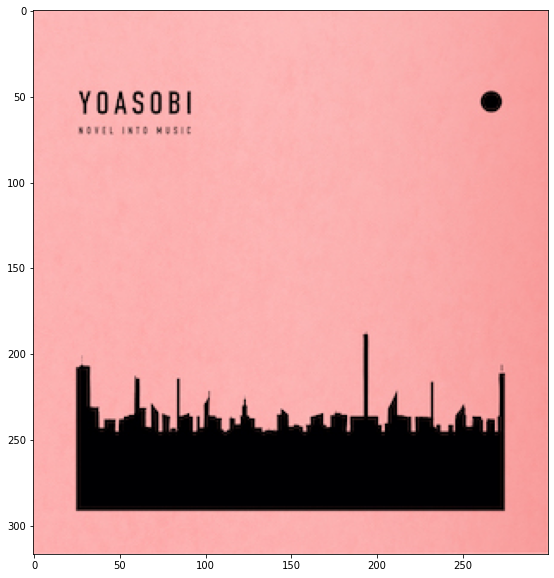

In [151]:
#Memanggil Image
image = cv2.imread('/content/Yoasobi_-_The_Book.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis('on')
plt.show()

Text(0.5, 1.0, 'Gray Image')

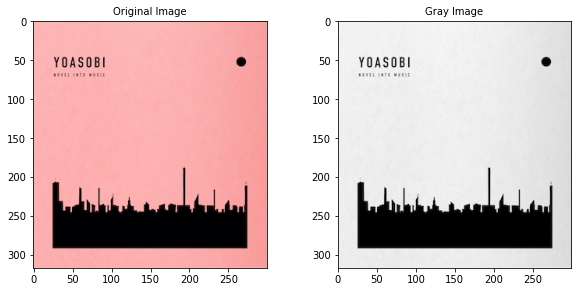

In [152]:
#Membuat Grayscale Pada Gambar
image = cv2.imread('/content/Yoasobi_-_The_Book.jpg')
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_rgb,cmap=plt.cm.gray)
plt.title('Original Image',fontsize = 10)

plt.subplot(222)
plt.imshow(img_gray,cmap=plt.cm.gray)
plt.title('Gray Image',fontsize = 10)

In [153]:
#Mendefinisikan Rotasi
def rotate90Clockwise(A):
    N = len(A[0])
    for i in range(N // 2):
        for j in range(i, N - i - 1):
            temp = A[i][j]
            A[i][j] = A[N - 1 - j][i]
            A[N - 1 - j][i] = A[N - 1 - i][N - 1 - j]
            A[N - 1 - i][N - 1 - j] = A[j][N - 1 - i]
            A[j][N - 1 - i] = temp
    return A

Text(0.5, 1.0, 'Convolution-Correlation Rotate')

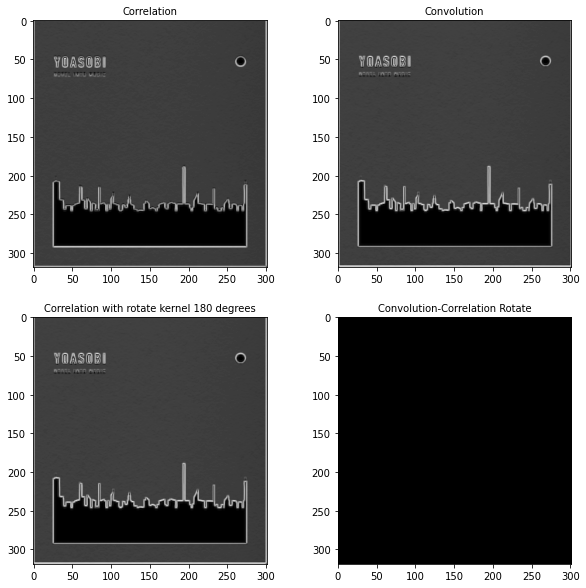

In [154]:
#Membuat Tepi Kernel Untuk Koordinat X dan Y
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
kernel_rotate90 = rotate90Clockwise(kernel.copy())

#Merotasikan Tepi Kernel Untuk Koordinat X dan Y
kernel_rotate180 = kernel.copy()
for a in range(2):
    rotate90Clockwise(kernel_rotate180)
kernel_rotate270 = rotate90Clockwise(kernel_rotate180.copy())

#Mendeteksi Konvolusi Untuk Koordinat X dan Y
conv_x = signal.convolve2d(img_gray,kernel)
conv_y = signal.convolve2d(img_gray,kernel_rotate90)

#Korelasi Untuk Koordinat X dan Y
corr_x = signal.correlate2d(img_gray,kernel)
corr_y = signal.correlate2d(img_gray,kernel_rotate90)

#Memanggil Hasil Perhitungan Untuk Koordinat X dan Y
fix_conv = np.sqrt(conv_x*conv_x+conv_y*conv_y)
fix_corr = np.sqrt(corr_x*corr_x+corr_y*corr_y)

#Merotasikan Korelasi Sebesar 180 derajat
rotate_corr_x = signal.correlate2d(img_gray,kernel_rotate180)
rotate_corr_y = signal.correlate2d(img_gray,kernel_rotate270)

fix_rotate = np.sqrt(rotate_corr_x*rotate_corr_x+rotate_corr_y*rotate_corr_y)

#Hasil
minus = fix_conv-fix_rotate

#Menampilkan Hasil Gambar
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(fix_corr,cmap=plt.cm.gray)
plt.title('Correlation',fontsize = 10)

plt.subplot(222)
plt.imshow(fix_conv,cmap=plt.cm.gray)
plt.title('Convolution',fontsize = 10)

plt.subplot(223)
plt.imshow(fix_rotate,cmap=plt.cm.gray)
plt.title('Correlation with rotate kernel 180 degrees',fontsize = 10)

plt.subplot(224)
plt.imshow(minus,cmap=plt.cm.gray)
plt.title('Convolution-Correlation Rotate',fontsize = 10)

In [180]:
#Membuat Fungsi Konvolusi FFT
start = time.time()
conv_fft = signal.fftconvolve(img_gray,kernel)
conv_fft = np.sqrt(conv_fft*conv_fft)
end = time.time()
fft_time = end-start

#Membuat Fungsi Konvolusi Langsung
start = time.time()
conv_dir = signal.convolve(img_gray,kernel)
conv_dir = np.sqrt(conv_dir*conv_dir)
end = time.time()
dir_time = end-start

Text(0.5, 1.0, 'Direct Convolution 0.01098s')

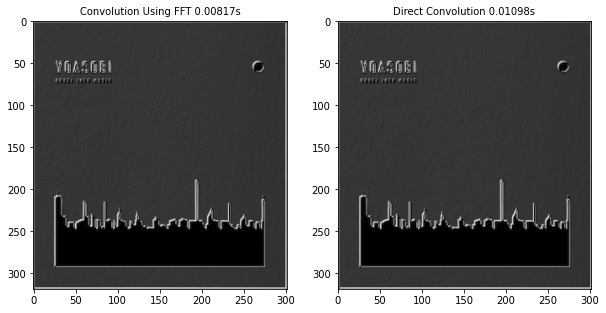

In [181]:
#Menampilkan Hasil Gambar
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(conv_fft,cmap=plt.cm.gray)
plt.title(f'Convolution Using FFT {fft_time:.5f}s',fontsize = 10)

plt.subplot(122)
plt.imshow(conv_dir,cmap=plt.cm.gray)
plt.title(f'Direct Convolution {dir_time:.5f}s',fontsize = 10)